### K-Means

#### Flat Clustering

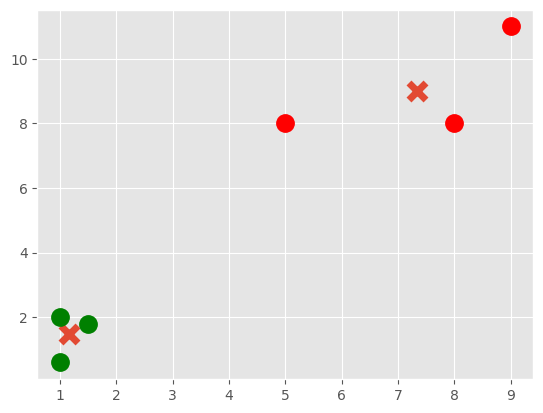

In [20]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans

style.use('ggplot')

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]
            ])

# plt.scatter(X[:, 0], X[:, 1], s=150)
# plt.show()

# Initialize Model
clf = KMeans(n_clusters=2)

# Train
clf.fit(X)

# Grouping and plotting
centroids = clf.cluster_centers_
labels = clf.labels_

colors = ['g.', 'r.', 'c.', 'b.', 'k.', 'w.']

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=25)

plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=150, linewidths=5)
plt.show()

Titanic Cluster

In [59]:
# Dataset: https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd

style.use('ggplot')

# Read file
df = pd.read_excel('titanic.xls')

def data_processing(data):
    # Drop columns to test impact
    df.drop(['name','body', 'ticket', 'boat', 'home.dest'], axis=1, inplace=True)

    # Convert all columns to numeric
    df.apply(pd.to_numeric, errors="ignore")

    # Fill up na 
    df.fillna(0, inplace=True)

def handle_non_numeric_data(df):
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}

        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            
            df[column] = list(map(convert_to_int, df[column]))
    
    return df

def define_data(df):
    # Define X and y
    X = np.array(df.drop(['survived'], axis=1).astype(float))
    X = preprocessing.scale(X)
    y = np.array(df['survived'])
    return X, y

# Main code
data_processing(df)
df = handle_non_numeric_data(df)
X, y = define_data(df)

# Initialize model
clf = KMeans(n_clusters=2)

# Train
clf.fit(X)

# Make a prediction based on the centroid
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))


C:\Users\Amirah\AppData\Local\Temp\ipykernel_13924\2993064627.py:19: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df.apply(pd.to_numeric, errors="ignore")


0.6860198624904508


### K-Means from Scratch

- Pick any two data points (centroids) to start, measure the distances of all points to the two initial centroids
- Take the mean of both classes, becomes the new centroid
- Repeat till the centroid value change is negligible

Error: 484.7222222222223
Error: 13.0
Error: 52.10727969348656
Error: 0.0


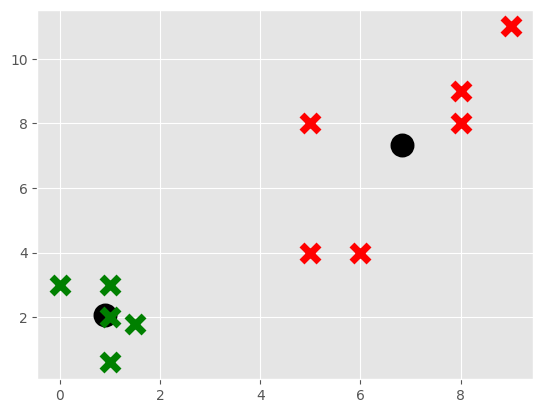

In [64]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

style.use('ggplot')

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11],
              [1,3],
              [8,9],
              [0,3],
              [5,4],
              [6,4]
            ])

# plt.scatter(X[:,0], X[:,1], s=150)
# plt.show()

colors = ['g', 'r', 'c', 'b', 'k', 'm']

class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, data):
        # Centroids dictionaryu showing groups in key:value
        self.centroids = {}

        # Take initial centroid
        for i in range(self.k):
            self.centroids[i] = data[i]

        # Iterate to optimize for centroid for min distance
        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            # Classify dataset and append
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
            
            # Check error value and compare against tolerance
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print("Error:", np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                print("Error:", np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                break


    def predict(self, data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

# Main Code
clf = K_Means(k=2)
clf.fit(X)

 # Iterate and see how the centroids change
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidth=5)
plt.show()

# Cluster new data
# unknowns = np.array([[1,3],
#                      [8,9],
#                      [0,3],
#                      [5,4],
#                      [6,4]
#                      ])

# for unknown in unknowns:
#     classification = clf.predict(unknown)
#     plt.scatter(unknown[0], unknown[1], marker='*', color = colors[classification], s=150, linewidths=5)

Apply manual K-Means to Titanic dataset

In [71]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

style.use('ggplot')

# Read file
df = pd.read_excel('titanic.xls')

colors = ['g', 'r', 'c', 'b', 'k', 'm']

class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, data):
        # Centroids dictionaryu showing groups in key:value
        self.centroids = {}

        # Take initial centroid
        for i in range(self.k):
            self.centroids[i] = data[i]

        # Iterate to optimize for centroid for min distance
        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            # Classify dataset and append
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
            
            # Check error value and compare against tolerance
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print("Error:", np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                print("Error:", np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                break


    def predict(self, data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

# Main code
data_processing(df)
df = handle_non_numeric_data(df)
X, y = define_data(df)

# Initialize model
clf = K_Means(k=2)

# Train
clf.fit(X)

# Make a prediction based on the centroid
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction == y[i]:
        correct += 1
print(correct/len(X))


Error: -665.8896093937445
0.33689839572192515


C:\Users\Amirah\AppData\Local\Temp\ipykernel_13924\2993064627.py:19: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df.apply(pd.to_numeric, errors="ignore")
